In [4]:
import numpy as np
from pyDecision.algorithm.p_i import preference_degree, promethee_i

# =========================
# Datos de entrada
# =========================
alts  = ["A", "B", "C"]
types = np.array([-1, 1, -1], dtype=float)

X = np.array([
    [900, 7, 4],  # A
    [1000, 8, 6],  # B
    [1200,  6, 8],  # C
], dtype=float)

w = np.array([0.40, 0.35, 0.25], dtype=float)
q = np.array([100, 2, 1], dtype=float)
p = np.zeros_like(q)          # <-- NECESARIO aunque no se use

# Parámetro S (solo se usa en gaussian/otras); aquí no se usa
S = np.zeros(3, dtype=float)

# Función por criterio (t2 = U-shape con indiferencia q,p)
F = ["t2", "t2", "t2"]

# Convertir todo a maximizar
dataset = X * types
n = len(alts)

# PASO 3: matriz π(a,b)
pi = preference_degree(dataset, w, q, p, S, F)  # ← ahora sí
np.fill_diagonal(pi, 0.0)

# PASO 4: flujos
phi_plus  = pi.sum(axis=1) / (n - 1)
phi_minus = pi.sum(axis=0) / (n - 1)

# PASO 5: relación PROMETHEE I (P+, I, R)
cp = promethee_i(dataset, w, q, S, p, F, graph=False)

print("π(a,b):\n", np.round(pi, 6))
print("\nphi+ :", np.round(phi_plus, 6))
print("phi- :", np.round(phi_minus, 6))
print("\ncp (P+/I/R):\n", cp)

π(a,b):
 [[0.   0.25 0.65]
 [0.   0.   0.65]
 [0.   0.   0.  ]]

phi+ : [0.45  0.325 0.   ]
phi- : [0.    0.125 0.65 ]

cp (P+/I/R):
 [['-' 'P+' 'P+']
 ['-' '-' 'P+']
 ['-' '-' '-']]


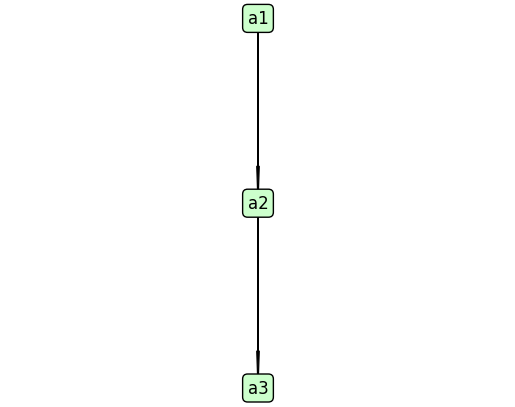

In [6]:
q = np.array([100, 2, 1], dtype=float)
p = np.zeros_like(q)          # <-- NECESARIO aunque no se use
S = np.zeros(3, dtype=float)

F = ["t2", "t2", "t2"]

dataset = X * types
n = len(alts)

pi = preference_degree(dataset, w, q, p, S, F)  # ← ahora sí
np.fill_diagonal(pi, 0.0)

phi_plus  = pi.sum(axis=1) / (n - 1)
phi_minus = pi.sum(axis=0) / (n - 1)

cp = promethee_i(dataset, w, q, S, p, F, graph=True)

In [ ]:
phi_plus 

array([0.45 , 0.325, 0.   ])

In [ ]:
phi_minus

array([0.   , 0.125, 0.65 ])